# Finding Eigenfaces - A similar approach can be used for Eigenvoices

Importing the required libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

**About the dataset used -  Labeled Faces in the Wild Cropped Version (LFWcrop) - Greyscale version**

The dataset contains images of faces of famous people. The size of each image is 64x64 pixels, cropped to get just the face of that person.

The below function is just to visualise the images from our dataset in a good-looking way.

In [2]:
"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

We are considering the first 1000 images only.
Each image is converted into a 64x64 numpy array.

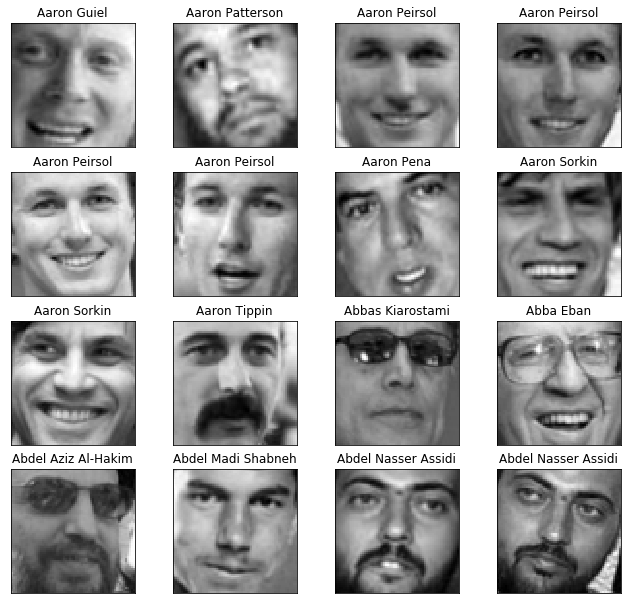

In [3]:
dir='lfwcrop_grey/faces'
celebrity_photos=os.listdir(dir)[1:1001]
celebrity_images=[dir+'/' + photo for photo in celebrity_photos]
images=np.array([plt.imread(image) for image in celebrity_images], dtype=np.float64)
celebrity_names=[name[:name.find('0')-1].replace("_", " ") for name in celebrity_photos]
n_samples, h, w = images.shape
plot_portraits(images, celebrity_names, h, w, n_row=2, n_col=4)

Next, we have defined the PCA function. Its arguments are X which is vectors of images and n_pc which is the number of principal components.

Principal components define an orthonormal basis that can extract the maximum variance in the original data. 
In our case, its shape is (1000, 4096). Since we needed to transform the images into vectors for PCA, we flattened each 64x64 array into a 4096x1 vector.

Geometrically PCA corresponds to “centering the dataset”, and then rotating it to align the axis of highest variance with the principle axis.

Therefore, we found the mean and subtract it from our data to center it around the origin. After that, we performed Singular Value Decomposition on the centered data to find those principle components called eigenfaces.

In [7]:
def pca(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    U, S, V = np.linalg.svd(centered_data)
    components = V[:n_pc]
    projected = U[:,:n_pc]*S[:n_pc]
    
    return projected, components, mean, centered_data

Here is our mean face of all 1000 faces in the dataset. We are trying to find the features that makes individuals different than the others. That is the reason for subtracting the mean face from everyone and maximising variance.

([], <a list of 0 Text yticklabel objects>)

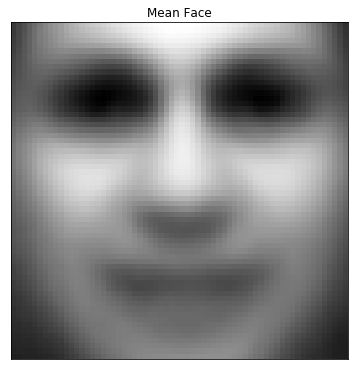

In [5]:
X = images.reshape(n_samples, h*w)
mean = np.mean(X, axis=0)
plt.figure(figsize=(5.2, 5.2))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
plt.subplot(1, 1, 1)
plt.imshow(mean.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Mean Face')
plt.xticks(())
plt.yticks(())

First parameter named n_components determines how many eigenfaces we want to create. Those are our principal components from which we will recover our data that is human face. Here eigenfaces.shape = (50, 64, 64)

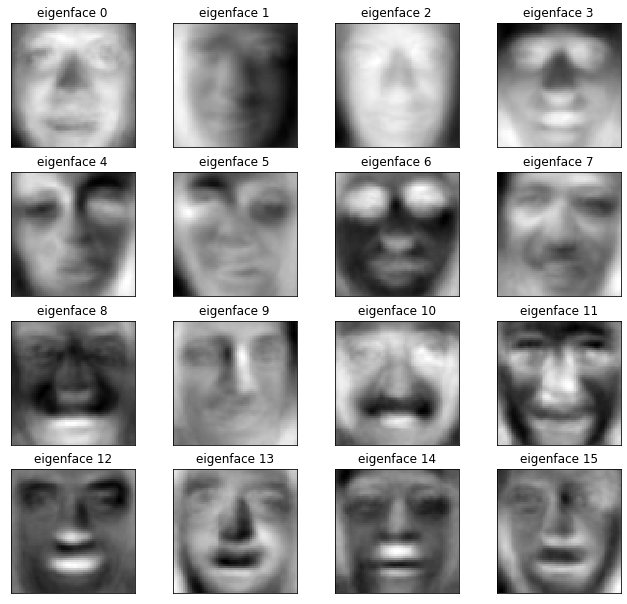

In [8]:
n_components = 50
P, C, M, Y= pca(X, n_pc=n_components)
eigenfaces = C.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 2, 4)

For reconstruction, we will use those eigenfaces. Each face is a weighted combination of those eigenfaces as you might say. To find weights, we should dot multiply our centered data and eigenfaces. Then, we should weight eigenfaces which gives us the centered face and add it up to the mean face again. After all, we are ready to take a look at the recovered faces compared to original ones.

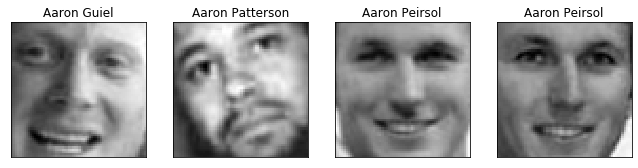

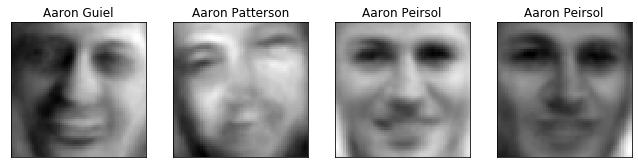

In [9]:
def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image
recovered_images=[reconstruction(Y, C, M, h, w, i) for i in range(len(images))]
plot_portraits(images, celebrity_names, h, w, n_row=1, n_col=4)
plot_portraits(recovered_images, celebrity_names, h, w, n_row=1, n_col=4)

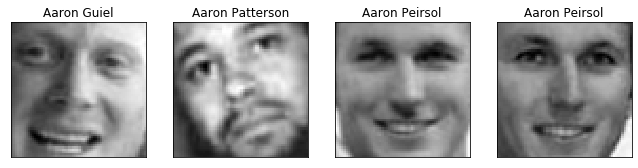

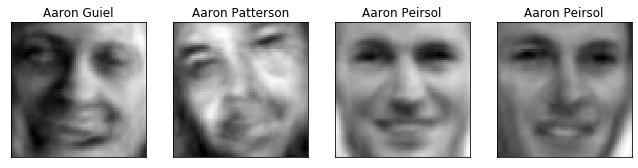

In [10]:
n_components = 100
X = images.reshape(n_samples, h*w)
P, C, M, Y= pca(X, n_pc=n_components)
eigenfaces = C.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
recovered_images=[reconstruction(Y, C, M, h, w, i) for i in range(len(images))]
plot_portraits(images, celebrity_names, h, w, n_row=1, n_col=4)
plot_portraits(recovered_images, celebrity_names, h, w, n_row=1, n_col=4)

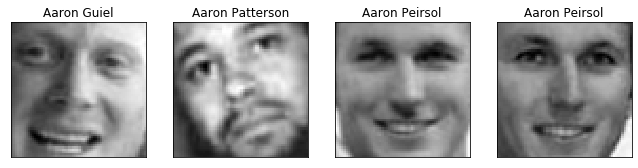

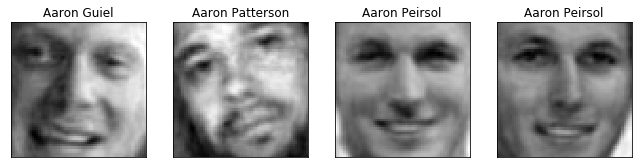

In [11]:
n_components = 250
X = images.reshape(n_samples, h*w)
P, C, M, Y= pca(X, n_pc=n_components)
eigenfaces = C.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
recovered_images=[reconstruction(Y, C, M, h, w, i) for i in range(len(images))]
plot_portraits(images, celebrity_names, h, w, n_row=1, n_col=4)
plot_portraits(recovered_images, celebrity_names, h, w, n_row=1, n_col=4)

## Testing

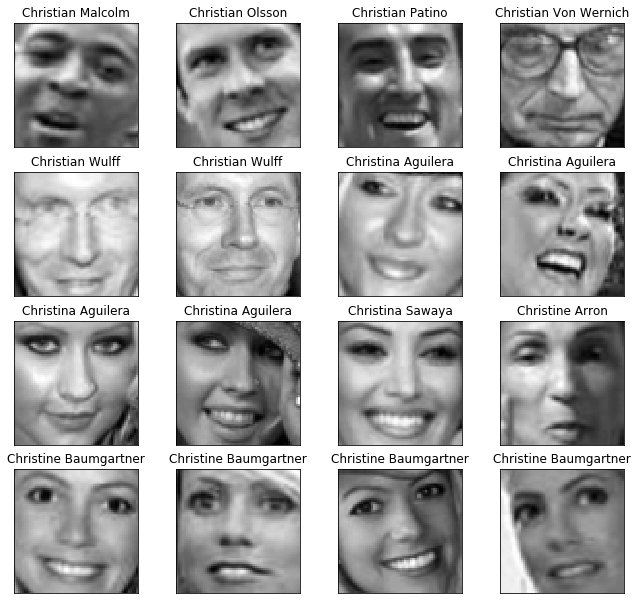

In [12]:
celebrity_photos_test=os.listdir(dir)[2001:3001]
celebrity_images_test=[dir+'/' + photo for photo in celebrity_photos_test]
images_test=np.array([plt.imread(image) for image in celebrity_images_test], dtype=np.float64)
celebrity_names_test=[name[:name.find('0')-1].replace("_", " ") for name in celebrity_photos_test]
n_samples, h, w = images.shape
plot_portraits(images_test, celebrity_names_test, h, w, n_row=2, n_col=4)

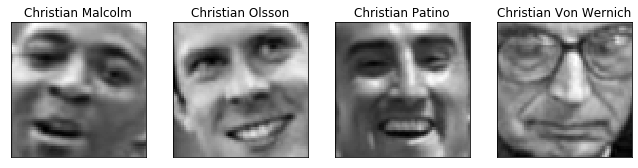

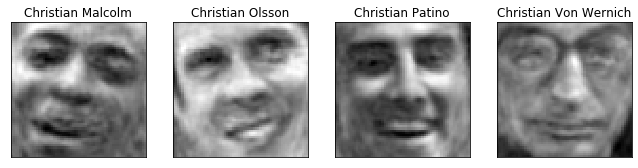

In [13]:
X_test = images_test.reshape(n_samples, h*w)
mean_test = np.mean(X_test, axis=0)
Y_test = X_test - mean_test
recovered_images_test=[reconstruction(Y_test, C, mean_test, h, w, i) for i in range(len(images_test))]
plot_portraits(images_test, celebrity_names_test, h, w, n_row=1, n_col=4)
plot_portraits(recovered_images_test, celebrity_names_test, h, w, n_row=1, n_col=4)

The end